# Visualizing prescription information

In [1]:
library(readr)
library(dplyr)
library(ggplot2)


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:stats’ からマスクされています: 

     filter, lag 


 以下のオブジェクトは ‘package:base’ からマスクされています: 

     intersect, setdiff, setequal, union 




In [2]:
df <- read_csv("data/mimic_iv/hosp/prescriptions.csv.gz")


── Column specification ────────────────────────────────────────────────────────
cols(
  subject_id = col_double(),
  hadm_id = col_double(),
  pharmacy_id = col_double(),
  starttime = col_datetime(format = ""),
  stoptime = col_datetime(format = ""),
  drug_type = col_character(),
  drug = col_character(),
  gsn = col_character(),
  ndc = col_character(),
  prod_strength = col_character(),
  form_rx = col_logical(),
  dose_val_rx = col_character(),
  dose_unit_rx = col_character(),
  form_val_disp = col_character(),
  form_unit_disp = col_character(),
  doses_per_24_hrs = col_double(),
  route = col_character()
)


Warning message:
“21215 parsing failures.
 row     col           expected actual                                      file
2660 form_rx 1/0/T/F/TRUE/FALSE    TAB 'data/mimic_iv/hosp/prescriptions.csv.gz'
2673 form_rx 1/0/T/F/TRUE/FALSE    TAB 'data/mimic_iv/hosp/prescriptions.csv.gz'
2674 form_rx 1/0/T/F/TRUE/FALSE    CAP 'data/mimic_iv/hosp/prescriptions.csv.gz'
2701 for

In [3]:
head(df)

subject_id,hadm_id,pharmacy_id,starttime,stoptime,drug_type,drug,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
17868682,22726960,73313910,2160-01-07 08:00:00,2160-01-07 21:00:00,MAIN,BuPROPion (Sustained Release),046238,00591083960,150mg SR Tablet,NA,300,mg,2,TAB,1,PO
17868682,22726960,16239987,2160-01-07 08:00:00,2160-01-08 16:00:00,MAIN,BuPROPion (Sustained Release),046238,00591083960,150mg SR Tablet,NA,150,mg,1,TAB,1,PO
17868682,22726960,16634804,2160-01-07 10:00:00,2160-01-07 16:00:00,MAIN,Aspirin,004380,00904404073,81mg Tab,NA,81,mg,1,TAB,1,PO
17868682,22726960,2697460,2160-01-07 14:00:00,2160-01-07 14:00:00,BASE,1/2 NS,001209,00338004304,1000mL Bag,NA,1000,mL,1000,mL,NA,IV
17868682,22726960,1383959,2160-01-07 15:00:00,2160-01-08 16:00:00,MAIN,Pneumococcal Vac Polyvalent,048548,00006494300,25mcg/0.5mL Vial,NA,0.5,mL,1,VIAL,NA,IM
17868682,22726960,64138666,2160-01-07 15:00:00,2160-01-08 16:00:00,MAIN,Sodium Chloride 0.9% Flush,NA,0,Syringe,NA,3,mL,0.6,SYR,NA,IV


In [4]:
dim(df)

[1] 17008053       17

In [5]:
df %>% 
    filter(subject_id == 12315540) %>% 
    head()

subject_id,hadm_id,pharmacy_id,starttime,stoptime,drug_type,drug,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
12315540,24554730,64260149,2172-08-12 10:00:00,2172-08-16 20:00:00,MAIN,Spironolactone,006816,51079098020,100mg Tablet,NA,100,mg,1,TAB,1,PO
12315540,24554730,90967703,2172-08-12 10:00:00,2172-08-16 20:00:00,MAIN,Furosemide,008209,51079007320,40mg Tablet,NA,40,mg,1,TAB,1,PO
12315540,24554730,19468712,2172-08-12 20:00:00,2172-08-16 20:00:00,MAIN,Clobetasol Propionate 0.05% Cream,007634,00472040030,30gm Tube,NA,1,Appl,0.01,TUBE,2,TP
12315540,24554730,95267496,2172-08-12 21:00:00,2172-08-13 20:00:00,MAIN,Albumin 25% (12.5g / 50mL),006329,67467064301,25%-50mL,NA,125,gm,10,VIAL,1,IV
12315540,24554730,50501409,2172-08-13 03:00:00,2172-08-14 02:00:00,MAIN,Aluminum-Magnesium Hydrox.-Simethicone,002716,00067033062,148 mL Bottle,NA,15-30,mL,0.1014-0.2027,BTL,1,PO
12315540,24554730,76782384,2172-08-13 03:00:00,2172-08-14 02:00:00,MAIN,Acetaminophen,004489,00182844789,325mg Tablet,NA,325-650,mg,1-2,TAB,1,PO


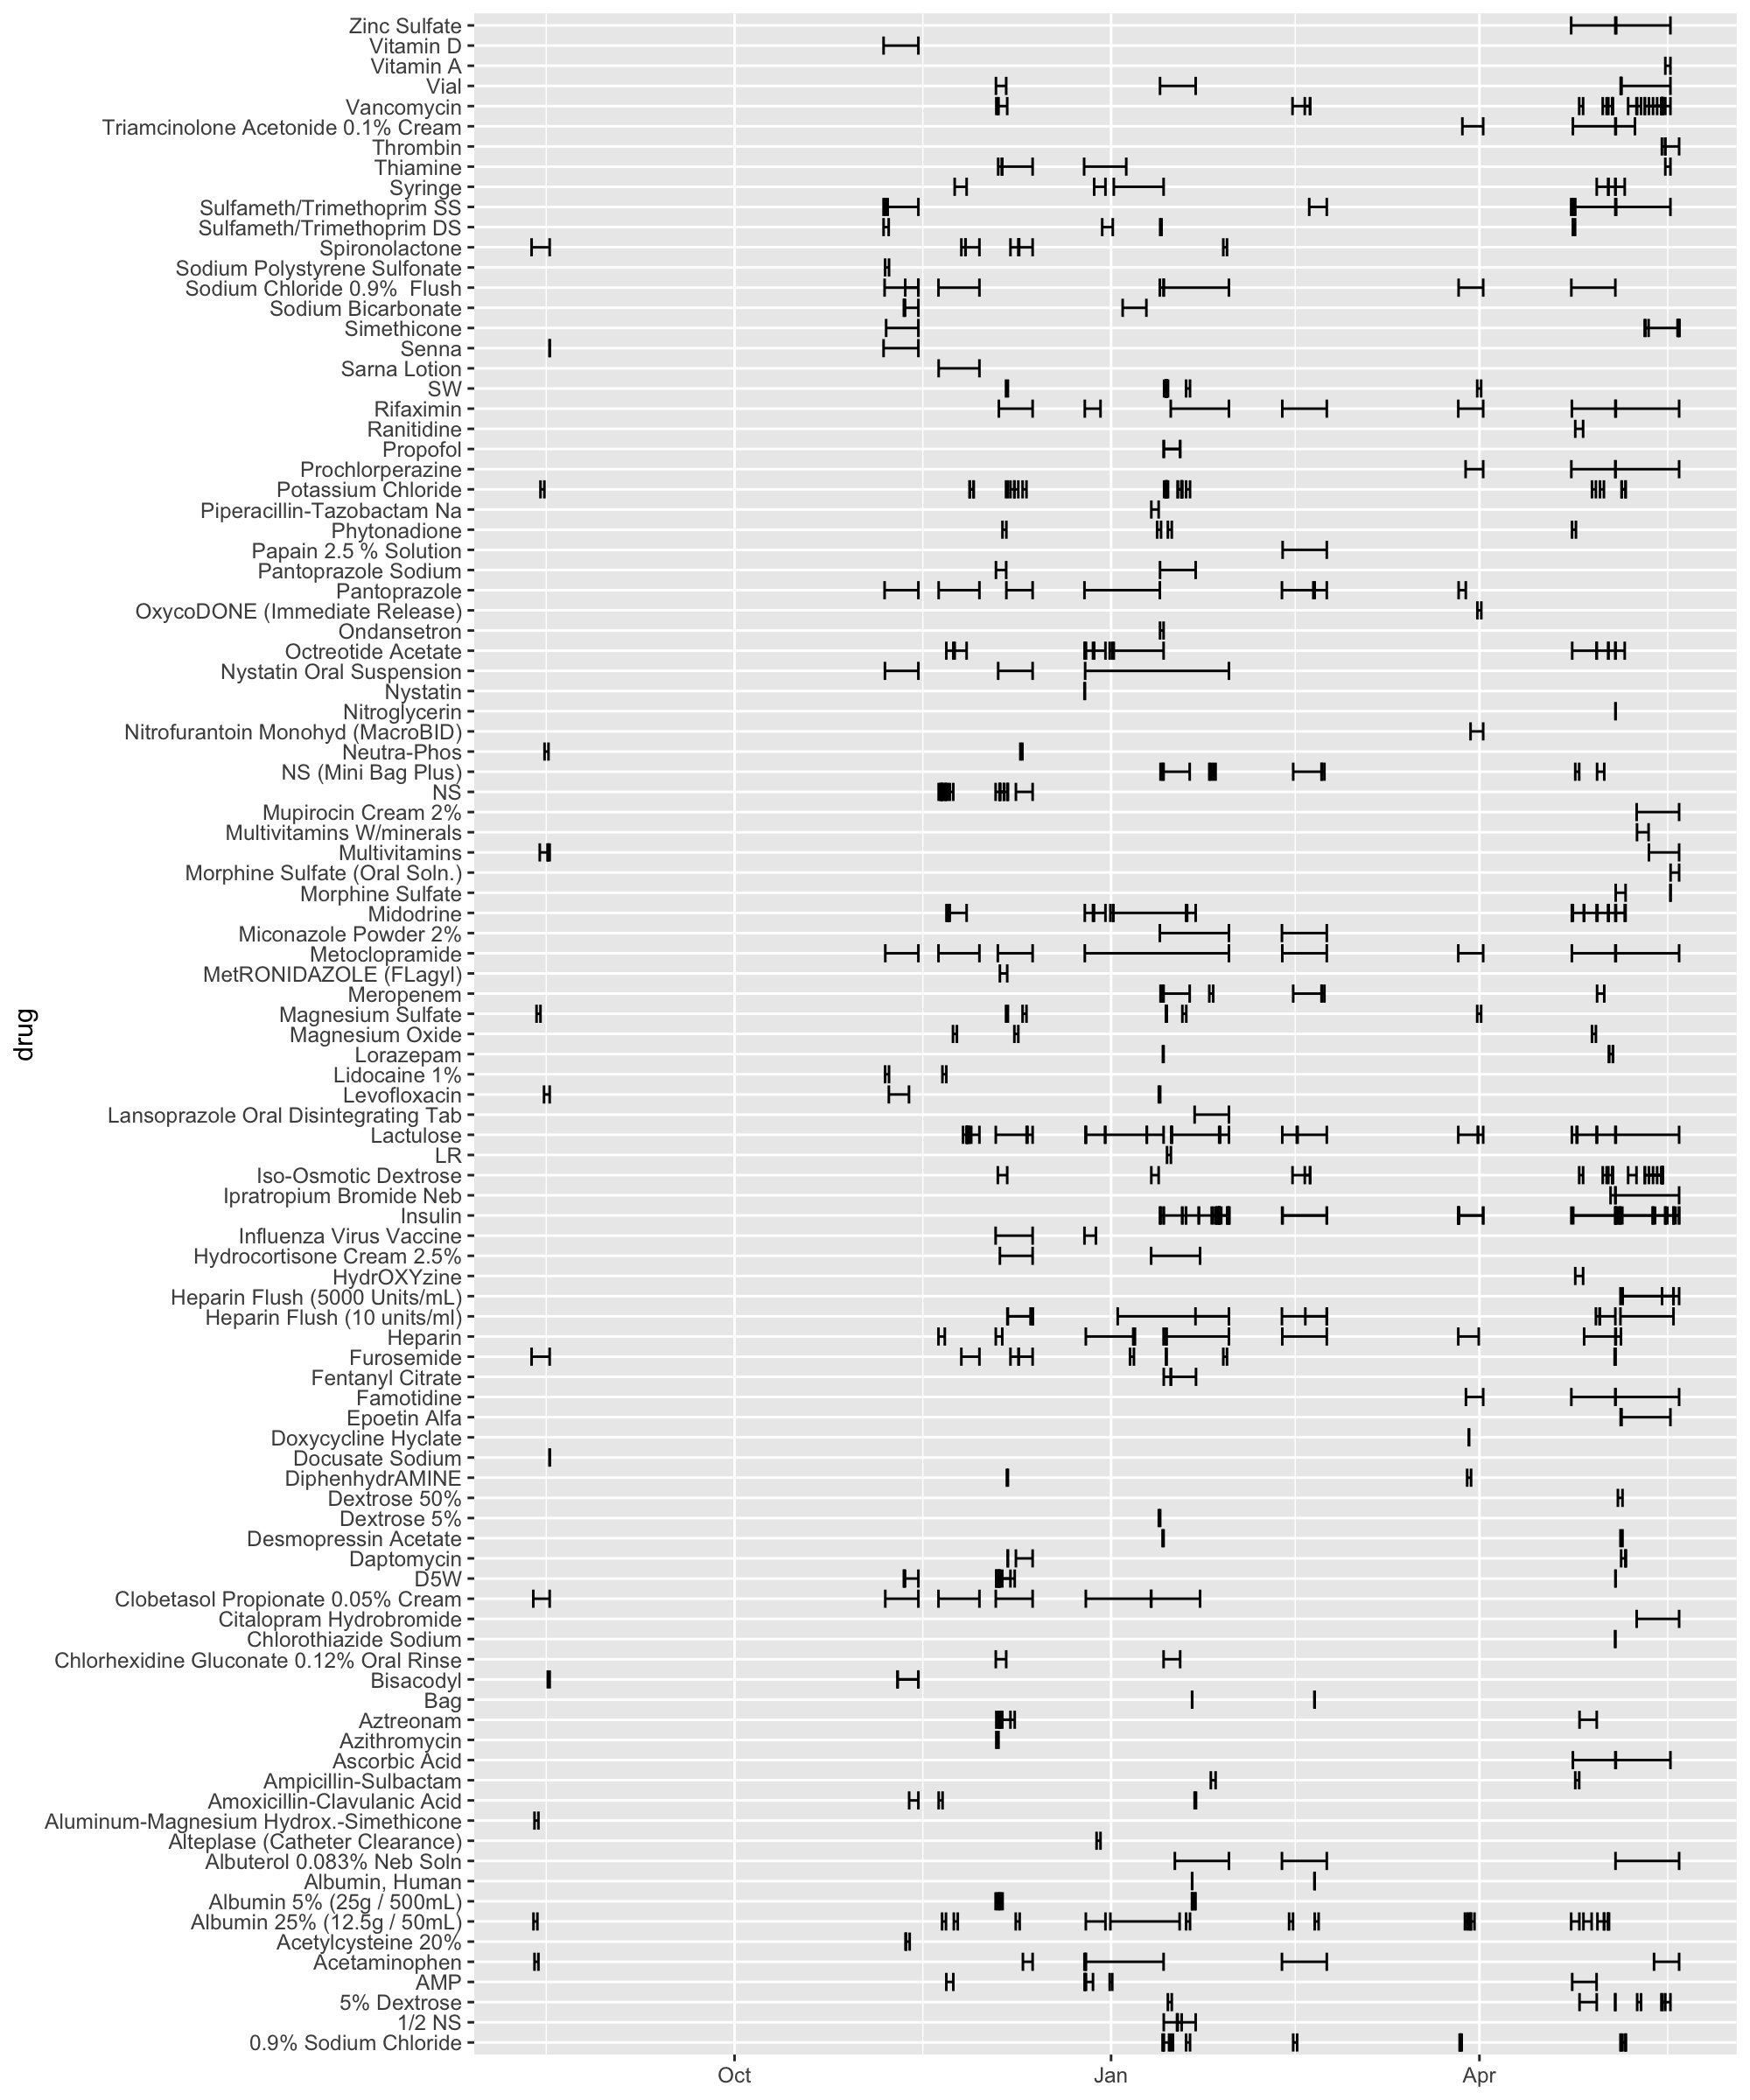

In [6]:
options(repr.plot.width = 10, repr.plot.height = 12, repr.plot.res = 200)

df %>% 
    filter(subject_id == 12315540) %>% 
    ggplot(aes(y = drug, xmin = starttime, xmax = stoptime)) + 
    geom_errorbar()

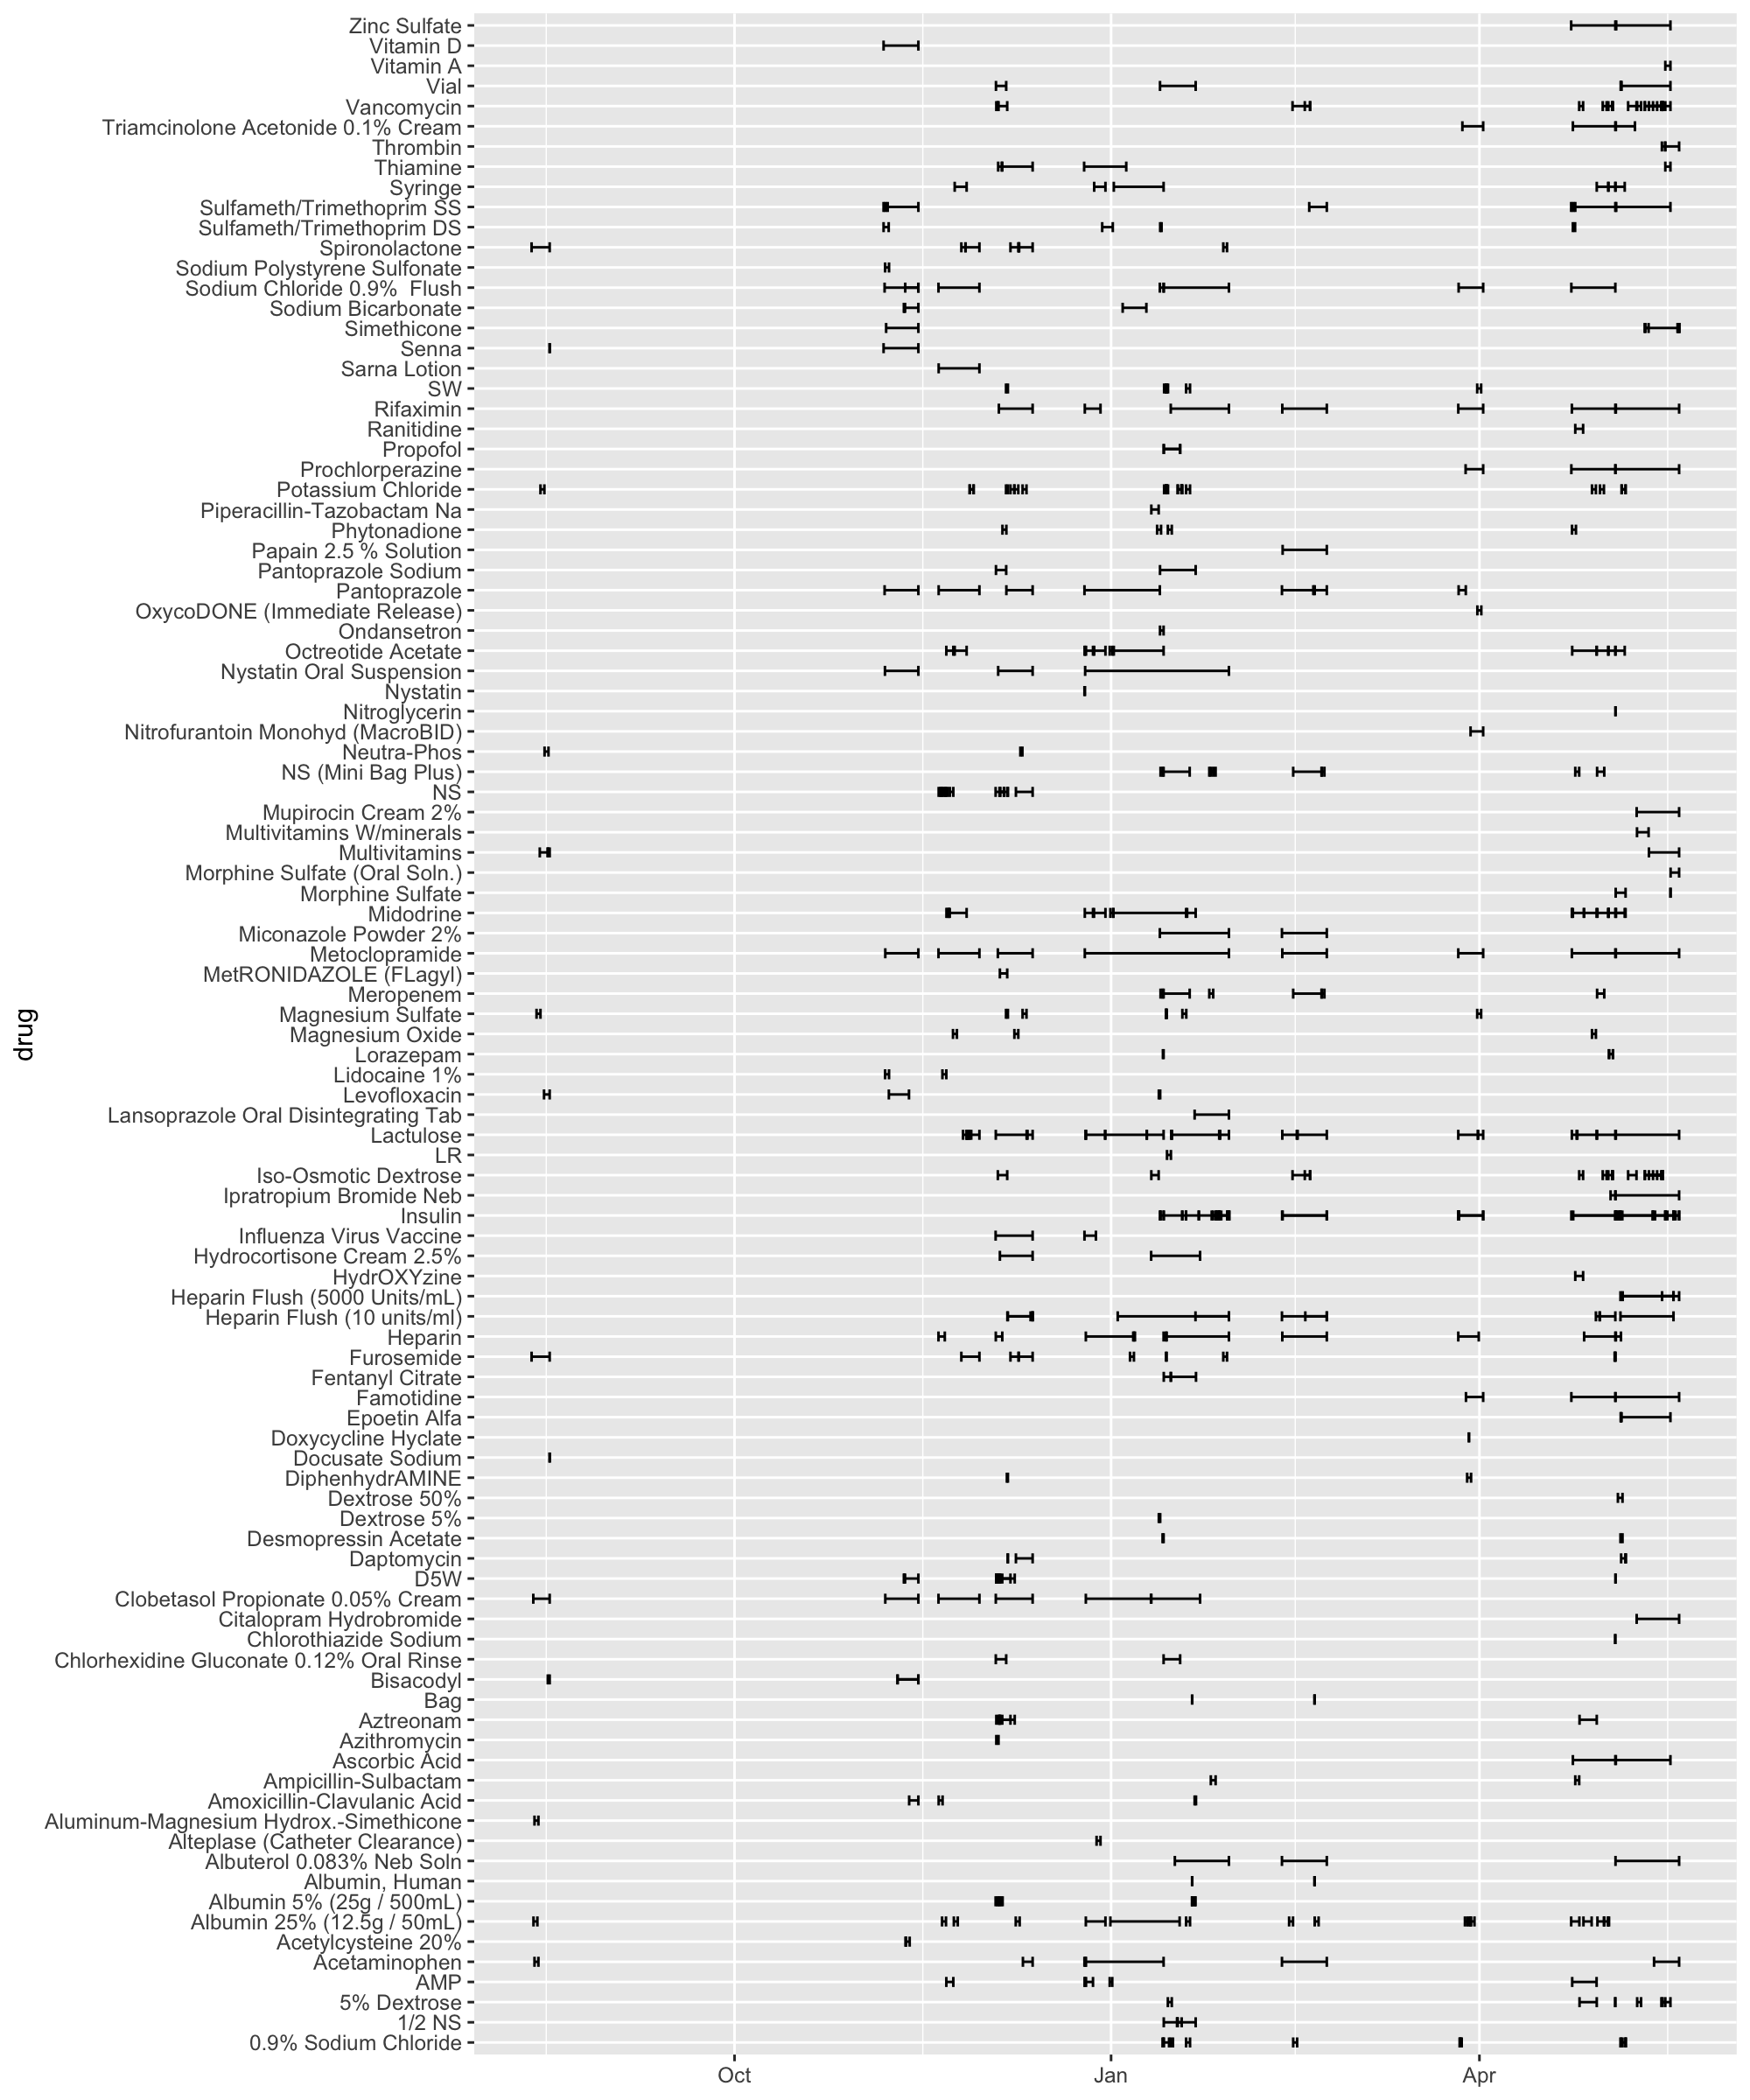

In [7]:
df %>% 
    filter(subject_id == 12315540) %>% 
    ggplot(aes(y = drug, xmin = starttime, xmax = stoptime)) + 
    geom_errorbarh(height = .5)

## Using ggalt

In [8]:
library(ggalt)

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



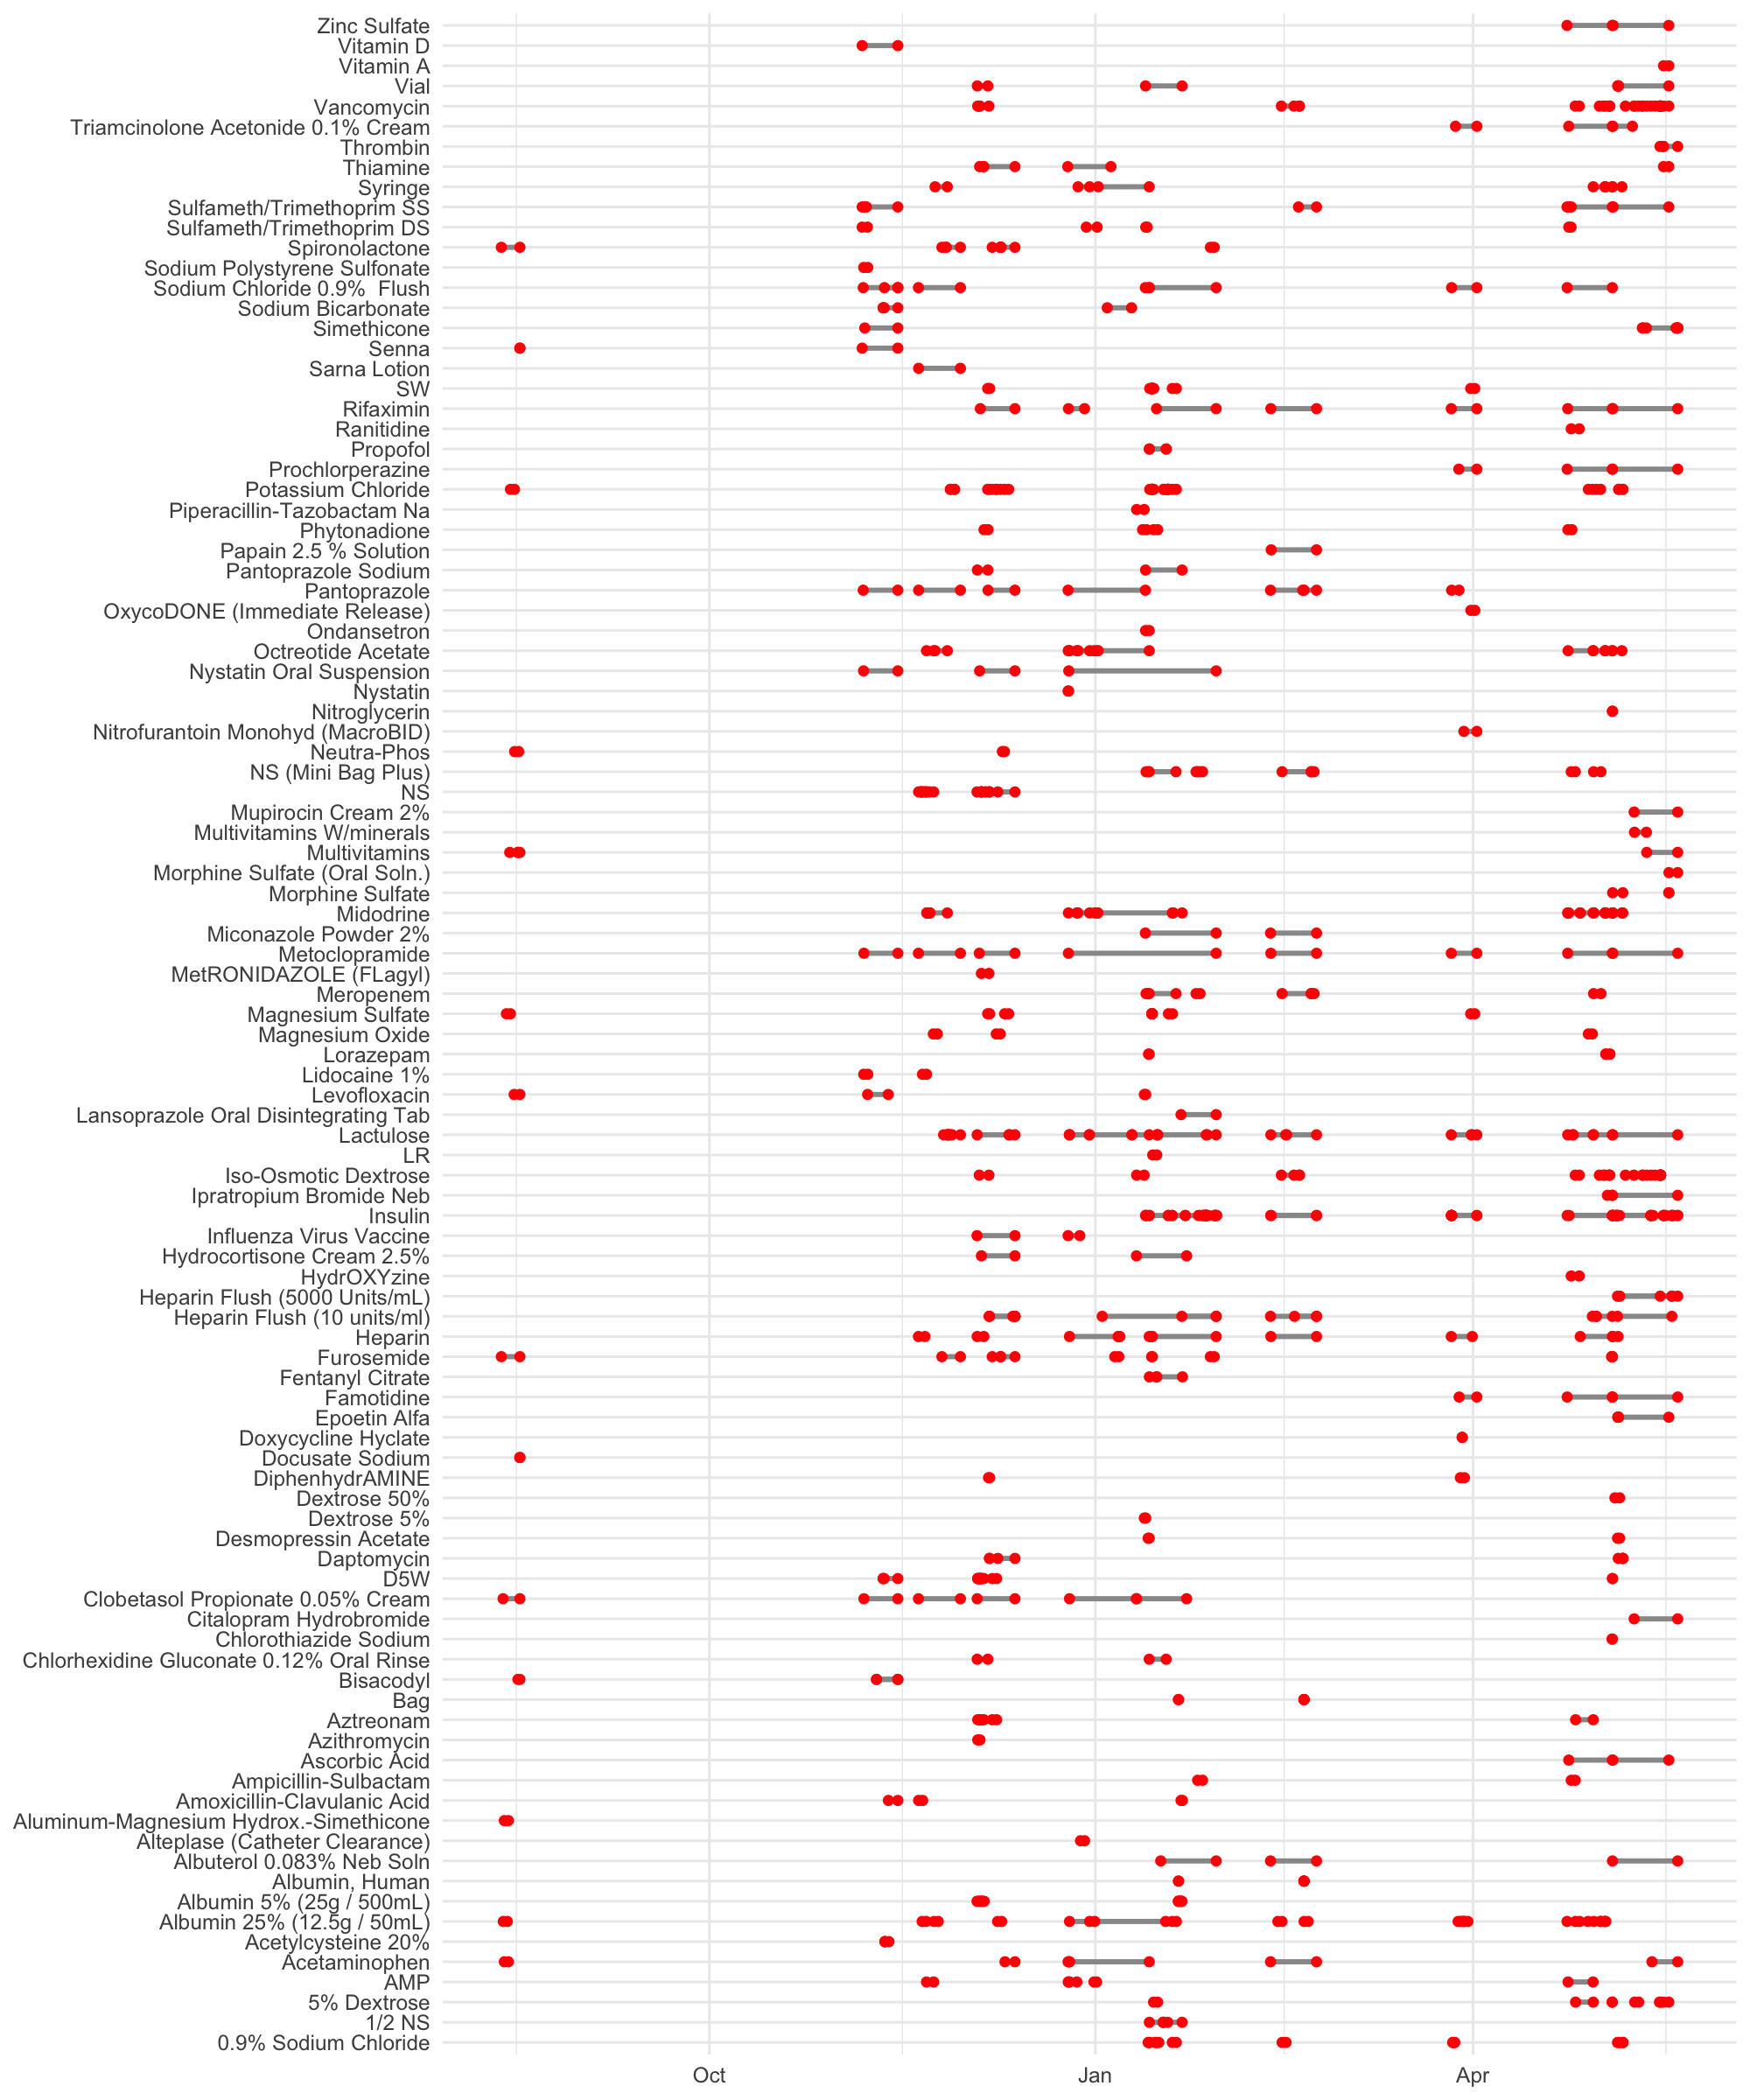

In [9]:
df %>% 
    filter(subject_id == 12315540) %>% 
    ggplot(aes(y = drug, x = starttime, xend = stoptime)) + 
    ggalt::geom_dumbbell(size = 1, size_x = 1.5, size_xend = 1.5, 
                         colour = "grey60", colour_x = "red", colour_xend = "red") + 
    labs(x = NULL, y = NULL) + 
    theme_minimal() + 
    theme(plot.title = element_text(size = 12), 
          axis.title.x = element_text(size = 10))